In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import warnings
from iso639 import languages

warnings.filterwarnings('ignore', category = FutureWarning)


In [ ]:
#Path toward scrapped data
path_scrapper = "D:/DocsDeCara/Boulot/IA_ML/MonGitHub/repBooksProjet/Books_project/datasets/"
file_scrapper = path_scrapper + "bothWebSites_InternetSearch_AllBooks_BookCrossing.csv"

#Path toward scrapped data, once automatic cleaning has been done (see script "Automatic_cleaning_colab_csv.ipynb")
file_scrapper_cleaned = path_scrapper + "bothWebSites_InternetSearch_AllBooks_BookCrossing_cleaned.csv"

In [ ]:
books_scrapped = pd.read_csv(file_scrapper, sep = ';', parse_dates=['Year-Of-Publication'])
len(books_scrapped)

114528

# First, we made a copy of data base of scrapped books

In [ ]:
books_scrapped_cleaned = books_scrapped.copy()

In [ ]:
books_scrapped_cleaned.head()

,ISBN_10,ISBN_13,OtherID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Category,Description,Language,Image,Pages,Awards,Author's genre,Same serie
0,195153448,"9,78E+12",0.0,Classical Mythology,Mark P. O. Morford,2003-01-01,"Oxford University Press, USA",Social Science,Provides an introduction to classical myths pl...,en,http://books.google.com/books/content?id=YABYK...,808.0,NaN,NaN,NaN
1,2005018,"9,78E+12",0.0,Clara Callan : A Novel,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada,Actresses,"In a small town in Canada, Clara Callan reluct...",en,http://books.google.com/books/content?id=yfx0v...,414.0,"\nScotiabank Giller Prize (2001), Governor Gen...",NaN,[]
2,60973129,0,IND:30000026059836,Decision in Normandy,Carlo D'Este,1991-01-01,Harper Perennial,1940-1949,"Here, for the first time in paperback, is an o...",en,http://books.google.com/books/content?id=_LufA...,555.0,NaN,History,[]
3,374157065,"9,78E+12",0,Flu : The Story of the Great Influenza Pandemi...,Gina Bari Kolata,1999-01-01,Macmillan,Medical,"Describes the great flu epidemic of 1918, an o...",en,http://books.google.com/books/content?id=GkthX...,330.0,NaN,Health,[]
4,393045218,"9,78E+12",0.0,The Mummies of Ürümchi,E. J. W. Barber,1999-01-01,W. W. Norton,Design,A look at the incredibly well-preserved ancien...,en,http://books.google.com/books/content?id=5OujQ...,240.0,\nKiriyama Prize Nominee for Nonfiction (1999)\n,History,[]


# Transformation of column names to be as our SQL data base
Columns :
    - 'book_id'
    - 'average_rating'
    - 'issue_flag'
    - 'is_active' 
    - 'data_source' 
do not exist in books_scrapped

In [ ]:
books_scrapped_cleaned.rename( columns = {'ISBN_10': 'isbn', 'ISBN_13': 'isbn_13', 'Book-Title': 'book_title', \
                                  'Book-Author': 'book_author', 'Year-Of-Publication': 'year_of_publication', \
                                  'Description': 'book_description', 'Language': 'book_language', \
                                  'Pages': 'number_of_pages', 'Awards': 'awards', 'Author\'s genre': 'author_genres', \
                                  'Same serie': 'books_in_series'}, inplace = True )

In [ ]:
books_scrapped_cleaned.head()

,isbn,isbn_13,OtherID,book_title,book_author,year_of_publication,Publisher,Category,book_description,book_language,Image,number_of_pages,awards,author_genres,books_in_series
0,195153448,"9,78E+12",0.0,Classical Mythology,Mark P. O. Morford,2003-01-01,"Oxford University Press, USA",Social Science,Provides an introduction to classical myths pl...,en,http://books.google.com/books/content?id=YABYK...,808.0,NaN,NaN,NaN
1,2005018,"9,78E+12",0.0,Clara Callan : A Novel,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada,Actresses,"In a small town in Canada, Clara Callan reluct...",en,http://books.google.com/books/content?id=yfx0v...,414.0,"\nScotiabank Giller Prize (2001), Governor Gen...",NaN,[]
2,60973129,0,IND:30000026059836,Decision in Normandy,Carlo D'Este,1991-01-01,Harper Perennial,1940-1949,"Here, for the first time in paperback, is an o...",en,http://books.google.com/books/content?id=_LufA...,555.0,NaN,History,[]
3,374157065,"9,78E+12",0,Flu : The Story of the Great Influenza Pandemi...,Gina Bari Kolata,1999-01-01,Macmillan,Medical,"Describes the great flu epidemic of 1918, an o...",en,http://books.google.com/books/content?id=GkthX...,330.0,NaN,Health,[]
4,393045218,"9,78E+12",0.0,The Mummies of Ürümchi,E. J. W. Barber,1999-01-01,W. W. Norton,Design,A look at the incredibly well-preserved ancien...,en,http://books.google.com/books/content?id=5OujQ...,240.0,\nKiriyama Prize Nominee for Nonfiction (1999)\n,History,[]


# Analysis of the data set
nb lines: 114528 lines

In [ ]:
books_scrapped_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114528 entries, 0 to 114527
Data columns (total 15 columns):
isbn                   114525 non-null object
isbn_13                114525 non-null object
OtherID                114525 non-null object
book_title             114525 non-null object
book_author            113582 non-null object
year_of_publication    112308 non-null datetime64[ns]
Publisher              97289 non-null object
Category               103965 non-null object
book_description       73667 non-null object
book_language          110513 non-null object
Image                  80665 non-null object
number_of_pages        114525 non-null float64
awards                 14932 non-null object
author_genres          73607 non-null object
books_in_series        114395 non-null object
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 13.1+ MB


In [ ]:
books_scrapped_cleaned.describe()

,number_of_pages
count,114525.000000
mean,277.309260
std,296.112703
min,0.000000
25%,176.000000
50%,256.000000
75%,359.000000
max,80500.000000


## year_of_publication

In [ ]:
books_scrapped_cleaned["year_of_publication"].head()

0   2003-01-01
1   2001-01-01
2   1991-01-01
3   1999-01-01
4   1999-01-01
Name: year_of_publication, dtype: datetime64[ns]

##### Lots of books published between 1983 and 2006

In [ ]:
min(books_scrapped_cleaned["year_of_publication"])

Timestamp('1796-01-01 00:00:00')

In [ ]:
max(books_scrapped_cleaned["year_of_publication"])

Timestamp('2030-01-01 00:00:00')

In [ ]:
#cut in intervals of about 4/5 years
cut_years = pd.cut(books_scrapped_cleaned["year_of_publication"], bins=50).value_counts(sort = False)
cut_years[nb_years.values > 10]

(1898-12-17 11:31:12, 1903-08-23 19:40:48]       12
(1903-08-23 19:40:48, 1908-04-28 03:50:24]       11
(1908-04-28 03:50:24, 1913-01-01 12:00:00]       13
(1917-09-06 20:09:36, 1922-05-13 04:19:12]       17
(1922-05-13 04:19:12, 1927-01-16 12:28:48]       20
(1927-01-16 12:28:48, 1931-09-21 20:38:24]       22
(1931-09-21 20:38:24, 1936-05-27 04:48:00]       27
(1936-05-27 04:48:00, 1941-01-30 12:57:36]       54
(1941-01-30 12:57:36, 1945-10-05 21:07:12]       43
(1945-10-05 21:07:12, 1950-06-11 05:16:48]      121
(1950-06-11 05:16:48, 1955-02-14 13:26:24]      227
(1955-02-14 13:26:24, 1959-10-20 21:36:00]      286
(1959-10-20 21:36:00, 1964-06-25 05:45:36]      573
(1964-06-25 05:45:36, 1969-02-28 13:55:12]      756
(1969-02-28 13:55:12, 1973-11-03 22:04:48]     1159
(1973-11-03 22:04:48, 1978-07-10 06:14:24]     3190
(1978-07-10 06:14:24, 1983-03-15 14:24:00]     6649
(1983-03-15 14:24:00, 1987-11-18 22:33:36]     9201
(1987-11-18 22:33:36, 1992-07-24 06:43:12]    16944
(1992-07-24 

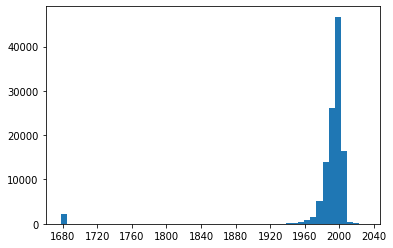

In [ ]:
res_plot = plt.hist(books_scrapped_cleaned["year_of_publication"], bins = 50)

##### Years intervals representing at least 5% of books in our dataset
years 1978 to 2006

In [ ]:
stats_year = pd.cut(books_scrapped_cleaned["year_of_publication"], bins=50).value_counts(sort = False, normalize = True)*100
stats_year[stats_year.values > 5]

(1978-07-10 06:14:24, 1983-03-15 14:24:00]     5.920326
(1983-03-15 14:24:00, 1987-11-18 22:33:36]     8.192649
(1987-11-18 22:33:36, 1992-07-24 06:43:12]    15.087082
(1992-07-24 06:43:12, 1997-03-29 14:52:48]    23.975140
(1997-03-29 14:52:48, 2001-12-02 23:02:24]    25.796025
(2001-12-02 23:02:24, 2006-08-08 07:12:00]    14.448659
Name: year_of_publication, dtype: float64

##### Zoom on the more recent years (after 1980)

In [ ]:
l = len(books_scrapped_cleaned.year_of_publication[books_scrapped_cleaned.year_of_publication > datetime.date(1980, 1, 1)])
p = round((l*100) / len(books_scrapped_cleaned), 2)
print("""% books published after %d (%0.2f)""" % (l, p))

l books published after 103793 (90.63)


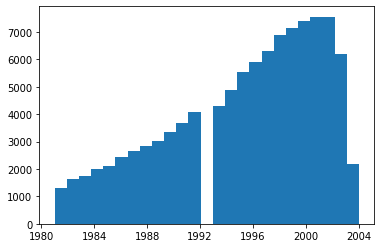

In [ ]:
res_plot = plt.hist(books_scrapped_cleaned.year_of_publication[np.logical_and( \
                                                            books_scrapped_cleaned.year_of_publication > datetime.date(1980, 1, 1), \
                                                            books_scrapped_cleaned.year_of_publication < datetime.date(2005, 1, 1))], \
             bins = 25)

## Category

=> A specific Categories analysis has been performed also in "Cat_AutGenr_Selection.ipynb"

=> The cleaning has then been performed inside "Automatic_cleaning_colab_csv.ipynb"

##### lots of books categories : 5 010 !

In [ ]:
books_scrapped_cleaned = pd.read_csv(file_scrapper_cleaned, sep = '|')

In [ ]:
books_scrapped_cleaned["Category"].value_counts(sort = False)

Guerrilla warfare                        2
Cold War                                 3
Asterix                                  2
Adulthood                                4
Icarian Community                        1
Mentally ill women                       1
Dangerously mentally ill                 4
Monologues                               1
Women athletes                           1
Cooking on ships                         1
GLBT                                     2
MiG                                      1
Los Angeles                              8
Holidays                                 5
Multiple-ending fiction                  1
North Dadota                             1
Adolescent girls                         1
Editing                                  2
Personnel management                     3
Lisbon                                   1
Wedding etiquette                        1
Easy reader                              1
Denken - Anthologie                      1
Don        

In [ ]:
#When considering categories, which is the one with 
#           the least books inside ?
#           the most books inside ?
stats_cat = books_scrapped_cleaned["Category"].value_counts(sort = True)
print("min nb: %d / max nb: %d" % (min(stats_cat.values), max(stats_cat.values)))
stats_cat

min nb: 1 / max nb: 40402


Fiction                      40402
Juvenile Fiction              5893
Biography                     3341
Mystery                       2894
History                       1998
Religion                      1741
Romance                       1361
Fantasy                       1350
Humor                         1281
Juvenile Nonfiction           1248
Classics                      1163
Nonfiction                    1103
Social Science                1095
Business                      1063
Science Fiction                981
Health                         922
Body                           906
Family                         882
Historical                     854
Cooking                        766
Psychology                     731
Travel                         718
Poetry                         687
Self-Help                      677
Science                        670
Childrens                      627
Horror                         580
Reference                      566
Philosophy          

##### Lots of Fiction : 35.28 % of all books

In [ ]:
stats_cat.index[np.argmax(stats_cat.values)]

'Fiction'

In [ ]:
#pourcentage of Fiction books in our dataset
round((max(stats_cat.values) / len(books_scrapped_cleaned) ) * 100, 2)

35.28

##### Number of categories with only one book inside 3005 !
Saved in cat_one_book.csv file

In [ ]:
cat_one_book = stats_cat[stats_cat.values == 1]
cat_one_book

Amish quilts                                     1
Christian biography.                             1
Soccer teams                                     1
Adventure stories.                               1
Femmes - France - Conditions sociales            1
Oracle                                           1
Cole                                             1
Stress management.                               1
Ethiopia                                         1
Nostalgia                                        1
Literatura contemporánea - Cuba - Siglo XX       1
Critically ill children                          1
Guernsey                                         1
Truthfulness and falsehood                       1
Last of England                                  1
Machine quilting                                 1
Talismans                                        1
European federation                              1
All terrain vehicles                             1
Hallucinogenic drugs and religi

In [ ]:
pd.DataFrame(cat_one_book.index[:]).to_csv(path_scrapper + "cat_one_book_afterCleaning.csv", index = False)

##### Categories the most represented

In [ ]:
stats_cat.sort_values(ascending = False)

Fiction                                                                  40402
Juvenile Fiction                                                          5893
Biography & Autobiography                                                 3072
Mystery                                                                   2894
History                                                                   1994
Religion                                                                  1741
Romance                                                                   1361
Fantasy                                                                   1350
Humor                                                                     1281
Juvenile Nonfiction                                                       1248
Classics                                                                  1163
Nonfiction                                                                1103
Social Science                                      

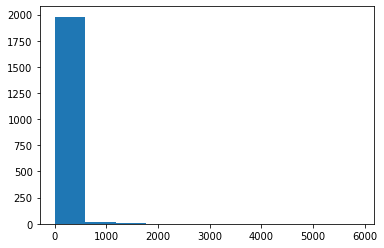

In [ ]:
res_plot = plt.hist(stats_cat[np.logical_and(stats_cat.values < 6000, stats_cat.values >1)].values)

##### Repartition of the number of elements insed categories : lots of categories with less than 80 books inside

In [ ]:
nb_elt_cat = pd.cut(stats_cat.values, bins=500).value_counts()
nb_elt_cat[nb_elt_cat.values > 0].sort_values(ascending = False)

(-39.401, 81.802]       4924
(81.802, 162.604]         28
(162.604, 243.406]         9
(243.406, 324.208]         9
(324.208, 405.01]          7
(405.01, 485.812]          4
(647.416, 728.218]         4
(809.02, 889.822]          3
(566.614, 647.416]         2
(1293.832, 1374.634]       2
(1213.03, 1293.832]        2
(1051.426, 1132.228]       2
(970.624, 1051.426]        2
(485.812, 566.614]         2
(728.218, 809.02]          2
(40321.198, 40402.0]       1
(5818.744, 5899.546]       1
(1132.228, 1213.03]        1
(1697.842, 1778.644]       1
(1940.248, 2021.05]        1
(2829.07, 2909.872]        1
(3071.476, 3152.278]       1
(889.822, 970.624]         1
dtype: int64

In [ ]:
res_plot = plt.hist(stats_cat[np.logical_and(stats_cat.values < 81, stats_cat.values >1)].values)

##### To keep 95% of the most important categories, we could keep the 3989 first categories (on 5010)

In [ ]:
#most represented author gender first
stats_cat_sorted = stats_cat.sort_values(ascending = False)
print("nb of categories:", len(stats_cat_sorted))

cumstats = np.cumsum(stats_cat_sorted.values)
cumstats = cumstats / cumstats[len(cumstats)-1]
type(cumstats)
len(cumstats[cumstats > 0.95])

nb of categories: 5010


3989

##### Categories representing at least 1% of all the books

In [ ]:
stats_cat[(stats_cat.values/len(books_scrapped_cleaned["Category"]))*100 > 1]

Mystery                       2894
Juvenile Fiction              5893
Humor                         1281
Romance                       1361
History                       1994
Religion                      1741
Biography & Autobiography     3072
Classics                      1163
Fantasy                       1350
Fiction                      40402
Juvenile Nonfiction           1248
Name: Category, dtype: int64

##### Both categories columns analysed ("Category" & "Category_other")

In [ ]:
stats_cate = books_scrapped_cleaned["Category"].value_counts(sort = True)
cate = stats_cate.index.unique()

stats_cate_other = books_scrapped_cleaned["Category_other"].value_counts(sort = True)
cate_other = stats_cate_other.index.unique()

In [ ]:
cate_tab = stats_cate
print(cate_tab)

for g in cate_other:
    if g in cate:
        cate_tab[g] = stats_cate_other[g] + stats_cate[g]
    else:
        cate_tab[g] = stats_cate_other[g]
        

Fiction                      40402
Juvenile Fiction              5893
Biography                     3341
Mystery                       2894
History                       1998
Religion                      1741
Romance                       1361
Fantasy                       1350
Humor                         1281
Juvenile Nonfiction           1248
Classics                      1163
Nonfiction                    1103
Social Science                1095
Business                      1063
Science Fiction                981
Health                         922
Body                           906
Family                         882
Historical                     854
Cooking                        766
Psychology                     731
Travel                         718
Poetry                         687
Self-Help                      677
Science                        670
Childrens                      627
Horror                         580
Reference                      566
Philosophy          

In [ ]:
cate_tab

Fiction                          40406
Juvenile Fiction                  5893
Biography                         3341
Mystery                           2894
History                           1998
Religion                          1741
Romance                           1361
Fantasy                           1350
Humor                             1281
Juvenile Nonfiction               1248
Classics                          1163
Nonfiction                        1103
Social Science                    1095
Business                          1063
Science Fiction                    981
Health                             923
Body                               906
Family                             882
Historical                         858
Cooking                            767
Psychology                         794
Travel                             718
Poetry                             687
Self-Help                          677
Science                            670
Childrens                

In [ ]:
#pourcentage of Fiction books in our dataset
round((max(cate_tab.values) / len(books_scrapped_cleaned) ) * 100, 2)

35.28

##### To keep 95% of the most important unified categories, we could keep the 4143 first categories (on 5113)

In [ ]:
#most represented author gender first
cate_tab_sorted = cate_tab.sort_values(ascending = False)
print("nb of genders:", len(cate_tab_sorted))

cumstats = np.cumsum(cate_tab_sorted.values)
cumstats = cumstats / cumstats[len(cumstats)-1]
type(cumstats)
len(cumstats[cumstats > 0.95])

nb of genders: 5113


4143

##### Repartition of the number of elements insed unified categories : lots of categories with less than 140 books inside

In [ ]:
nb_elt_aut = pd.cut(cate_tab_sorted.values, bins=300).value_counts()
nb_elt_aut[nb_elt_aut.values > 0].sort_values(ascending = False)

(-39.405, 135.683]      5034
(135.683, 270.367]        22
(270.367, 405.05]         18
(809.1, 943.783]           7
(405.05, 539.733]          6
(674.417, 809.1]           5
(539.733, 674.417]         4
(943.783, 1078.467]        3
(1078.467, 1213.15]        3
(1213.15, 1347.833]        2
(1347.833, 1482.517]       2
(5792.383, 5927.067]       1
(1617.2, 1751.883]         1
(1886.567, 2021.25]        1
(2829.35, 2964.033]        1
(3098.717, 3233.4]         1
(3233.4, 3368.083]         1
(40271.317, 40406.0]       1
dtype: int64

##### Unified categories representing at least 1% of all the books

In [ ]:
cate_tab[(cate_tab.values/len(books_scrapped_cleaned["Category_other"]))*100 > 1]

Fiction                40406
Juvenile Fiction        5893
Biography               3341
Mystery                 2894
History                 1998
Religion                1741
Romance                 1361
Fantasy                 1350
Humor                   1281
Juvenile Nonfiction     1248
Classics                1163
Autobiography           3153
Name: Category, dtype: int64

## Authors gender

=> A specific author gender analysis has been performed also in "Cat_AutGenr_Selection.ipynb"

=> The cleaning has then been performed inside "Automatic_cleaning_colab_csv.ipynb"

In [ ]:
books_scrapped_cleaned["author_genres"].head(10)

0                     NaN
1                     NaN
2                 History
3                  Health
4                 History
5    Literature & Fiction
6                 History
7     Mystery & Thrillers
8                 History
9    Literature & Fiction
Name: author_genres, dtype: object

##### Creation of a second column for the second author gender, as several genders can appear in this column, with & as separator
*   "author_genres"
*   "author_genres_other"

(performed on "Automatic_cleaning_colab_csv.ipynb")

In [ ]:
books_scrapped_cleaned = pd.read_csv(file_scrapper_cleaned, sep = '|')

##### Analysis of author_genres

In [ ]:
stats_aut = books_scrapped_cleaned["author_genres"].value_counts(sort = False)
stats_aut

Folk Tales                        21
Relationships                     29
Cats                               2
Film                              18
Women's Fiction                   15
Geology                            1
Editor                             1
Women                             72
Computing                          2
Contemporary                     206
Horticulture                       2
Short Story                        1
Paranormal                        85
Computer Science                   1
Chronicles                         1
Film Critic                        1
Firearms                           1
Erotic                             3
Mystery                         9505
Young Adult Paranormal             2
Aging                              1
Home                              59
Comedy                             7
Adventure                         51
Play                               1
Magic Realism                      3
Illustrations                      2
L

In [ ]:
print("min nb: %d / max nb: %d" % (min(stats_aut.values), max(stats_aut.values)))

min nb: 1 / max nb: 11880


In [ ]:
stats_aut.index[np.argmax(stats_aut.values)]

'Literature'

##### Lots of Literature as author gender

In [ ]:
stats_aut_sorted = stats_aut.sort_values(ascending = False)
stats_aut_sorted[stats_aut_sorted.values > 100]

Literature            11880
Mystery                9505
Romance                8118
Science Fiction        6972
Fiction                5757
Children's Books       4825
Nonfiction             3088
Children's             1834
Historical Fiction     1825
Horror                 1682
Biographies            1312
History                1257
Religion               1240
Poetry                 1177
Fantasy                 983
Young Adult             881
Thriller                783
Comics                  772
Science                 610
Philosophy              590
Crime                   549
Theatre                 455
Health                  407
Travel                  400
Memoir                  373
Biography               347
Humor                   340
Business                308
Christian               297
Politics                275
Spirituality            236
Psychology              228
Contemporary            206
Suspense                200
Cooking                 190
Outdoors            

##### Number of element inside each author genres, when 1 < nb_elt < 9000

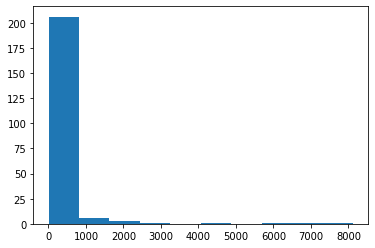

In [ ]:
res_plot = plt.hist(stats_aut[np.logical_and(stats_aut.values < 9000, stats_aut.values >1)].values)

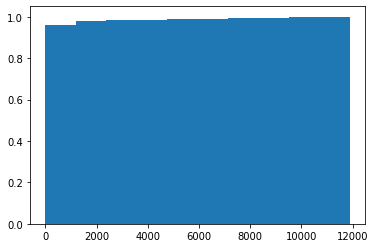

In [ ]:
stats_aut_sorted = stats_aut.sort_values(ascending = True)
res_plot = plt.hist(stats_aut_sorted.values, density = True, cumulative = True)

##### To keep 95% of the most important author genres, we could keep the 303 first author genres (on 338)

In [ ]:
#most represented author gender first
stats_aut_sorted = stats_aut.sort_values(ascending = False)
print("nb of genders:", len(stats_aut_sorted))

cumstats = np.cumsum(stats_aut_sorted.values)
cumstats = cumstats / cumstats[len(cumstats)-1]
type(cumstats)
len(cumstats[cumstats > 0.95])

nb of genders: 338


303

##### Number of element inside each author genres, classified by intervals
Lots of author genres with less than 240 elements inside

In [ ]:
nb_elt_aut = pd.cut(stats_aut.values, bins=50).value_counts()
nb_elt_aut[nb_elt_aut.values > 0].sort_values(ascending = False)

(-10.879, 238.58]      308
(238.58, 476.16]         9
(1664.06, 1901.64]       3
(1188.9, 1426.48]        3
(713.74, 951.32]         3
(476.16, 713.74]         3
(951.32, 1188.9]         2
(11642.42, 11880.0]      1
(9504.2, 9741.78]        1
(8078.72, 8316.3]        1
(6890.82, 7128.4]        1
(5702.92, 5940.5]        1
(4752.6, 4990.18]        1
(2851.96, 3089.54]       1
dtype: int64

##### author genres representing at least 1% of all the books

In [ ]:
stats_aut[(stats_aut.values/len(books_scrapped_cleaned["author_genres"]))*100 > 1]

Mystery                9505
Poetry                 1177
Science Fiction        6972
Children's Books       4825
Romance                8118
History                1257
Religion               1240
Biographies            1312
Children's             1834
Nonfiction             3088
Literature            11880
Horror                 1682
Historical Fiction     1825
Fiction                5757
Name: author_genres, dtype: int64

##### author genres with only one element inside

In [ ]:
aut_one_book = stats_aut[stats_aut.values == 1]
aut_one_book

Geology                       1
Editor                        1
Short Story                   1
Computer Science              1
Chronicles                    1
Film Critic                   1
Firearms                      1
Aging                         1
Play                          1
Literary Philosophy           1
Native Americans              1
Gothic                        1
Experimental                  1
Scots Language                1
Urban Legends                 1
Cartoonist                    1
Emergency                     1
Essayist                      1
Real Estate                   1
War Fiction                   1
Civil Rights                  1
Contemporary Non Fiction      1
Games                         1
Numismatics                   1
Radio Dramas                  1
Middle Grade                  1
Attention Deficit Disorder    1
Fiction/magic Realism         1
Family Drama                  1
Medieval History              1
                             ..
Translat

In [ ]:
pd.DataFrame(aut_one_book.index[:]).to_csv(path_scrapper + "author_gender_one_book.csv", index = False)

##### Analysis of author_genres_other

In [ ]:
stats_aut_other = books_scrapped_cleaned["author_genres_other"].value_counts(sort = False)
stats_aut_other

Film                        4
Painting                    3
Tv                          1
Internet                   29
Memoir                      1
Crafts                      1
Gender Studies             72
Graphic Novels            608
Science Fiction           131
Suspense                    4
History                     3
Television                  3
Sexuality                   2
Lesbian                    79
Memoirs                  1312
Thrillers                7522
Investing                 166
Military History            1
Drama                       1
Garden                     59
Hobbies                    69
Management                  5
Social Sciences             3
Nature                    167
Nonfiction                  9
Literature                  1
Contemporary Fiction       12
Biography                   2
Humour                      1
Technical                  30
Fantasy                  5545
Culture                     1
Photography               130
Spirituali

In [ ]:
print("min nb: %d / max nb: %d" % (min(stats_aut_other.values), max(stats_aut_other.values)))

min nb: 1 / max nb: 11854


##### Lots of Fiction as author other gender

In [ ]:
stats_aut_other.index[np.argmax(stats_aut_other.values)]

'Fiction'

In [ ]:
stats_aut_other_sorted = stats_aut_other.sort_values(ascending = False)
stats_aut_other_sorted[stats_aut_other_sorted.values > 100]

Fiction            11854
Thrillers           7522
Fantasy             5545
Memoirs             1312
Spirituality         956
Graphic Novels       608
Nature               167
Investing            166
Families             132
Science Fiction      131
Photography          130
Name: author_genres_other, dtype: int64

##### Number of element inside each author other genres, when 1 < nb_elt < 8000

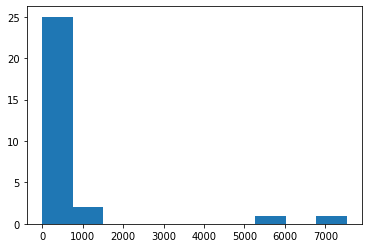

In [ ]:
res_plot = plt.hist(stats_aut_other[np.logical_and(stats_aut_other.values < 8000, stats_aut_other.values >1)].values)

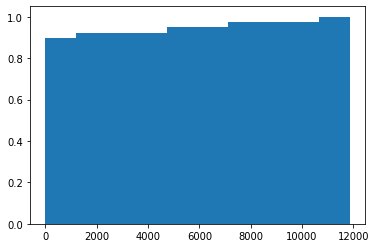

In [ ]:
stats_aut_other_sorted = stats_aut_other.sort_values(ascending = True)
res_plot = plt.hist(stats_aut_other_sorted.values, density = True, cumulative = True)

##### To keep 95% of the most important author other genres, we could keep the 34 first author other genres (on 39)

In [ ]:
#most represented author gender first
stats_aut_other_sorted = stats_aut_other.sort_values(ascending = False)
print("nb of genders:", len(stats_aut_other_sorted))

cumstats = np.cumsum(stats_aut_other_sorted.values)
cumstats = cumstats / cumstats[len(cumstats)-1]
type(cumstats)
len(cumstats[cumstats > 0.95])

nb of genders: 39


34

##### Number of element inside each author genres, classified by intervals
Lots of author genres with less than 120 elements inside

In [ ]:
nb_elt_aut_other = pd.cut(stats_aut_other.values, bins=100).value_counts()
nb_elt_aut_other[nb_elt_aut_other.values > 0].sort_values(ascending = False)

(-10.853, 119.53]      28
(119.53, 238.06]        5
(11735.47, 11854.0]     1
(7468.39, 7586.92]      1
(5453.38, 5571.91]      1
(1304.83, 1423.36]      1
(949.24, 1067.77]       1
(593.65, 712.18]        1
dtype: int64

##### author other genres with only one element inside

In [ ]:
aut_other_one_book = stats_aut_other[stats_aut_other.values == 1]
aut_other_one_book

Tv                  1
Memoir              1
Crafts              1
Military History    1
Drama               1
Literature          1
Humour              1
Culture             1
Sociology           1
Name: author_genres_other, dtype: int64

In [ ]:
pd.DataFrame(aut_other_one_book.index[:]).to_csv(path_scrapper + "author_other_gender_one_book.csv", index = False)

##### author other genres representing at least 1% of all the books

In [ ]:
stats_aut_other[(stats_aut_other.values/len(books_scrapped_cleaned["author_genres_other"]))*100 > 1]

Memoirs       1312
Thrillers     7522
Fantasy       5545
Fiction      11854
Name: author_genres_other, dtype: int64

##### Both author genres columns analysis

In [ ]:
other_genres = stats_aut_other.index.unique()
genres = stats_aut.index.unique()

In [ ]:
genres_tab = stats_aut
print(genres_tab)

for g in other_genres:
    if g in genres:
        genres_tab[g] = stats_aut_other[g] + stats_aut[g]
    else:
        genres_tab[g] = stats_aut_other[g]
        

Folk Tales                        21
Relationships                     29
Cats                               2
Film                              18
Women's Fiction                   15
Geology                            1
Editor                             1
Women                             72
Computing                          2
Contemporary                     206
Horticulture                       2
Short Story                        1
Paranormal                        85
Computer Science                   1
Chronicles                         1
Film Critic                        1
Firearms                           1
Erotic                             3
Mystery                         9505
Young Adult Paranormal             2
Aging                              1
Home                              59
Comedy                             7
Adventure                         51
Play                               1
Magic Realism                      3
Illustrations                      2
L

In [ ]:
genres_tab

Folk Tales                     21
Relationships                  29
Cats                            2
Film                           58
Women's Fiction                15
Geology                         1
Editor                          1
Women                          72
Computing                       2
Contemporary                  206
Horticulture                    2
Short Story                     1
Paranormal                     85
Computer Science                1
Chronicles                      1
Film Critic                     1
Firearms                        1
Erotic                          3
Mystery                      9505
Young Adult Paranormal          2
Aging                           1
Home                           59
Comedy                          7
Adventure                      51
Play                            1
Magic Realism                   3
Illustrations                   2
Literary Philosophy             1
Anthologies                     4
Business      

##### Lots of Literature as unified author genres

In [ ]:
genres_tab_sorted = genres_tab.sort_values(ascending = False)
genres_tab_sorted[genres_tab_sorted > 100]

Literature            35641
Fiction               29125
Science Fiction       21047
Mystery                9505
Nonfiction             9273
Fantasy                8494
Romance                8118
Thrillers              7576
Children's Books       4825
History                3774
Children's             1834
Historical Fiction     1825
Horror                 1682
Spirituality           1664
Memoirs                1312
Biographies            1312
Religion               1240
Poetry                 1177
Memoir                 1120
Biography              1043
Young Adult             881
Thriller                783
Comics                  772
Graphic Novels          626
Science                 610
Suspense                604
Philosophy              590
Crime                   549
Theatre                 455
Health                  407
Travel                  400
Humor                   340
Business                308
Christian               297
Social Sciences         282
Politics            

##### To keep 95% of the most important unified author genres, we could keep the 324 first author other genres (on 352)

In [ ]:
#most represented author gender first
genres_tab_sorted = genres_tab.sort_values(ascending = False)
print("nb of genders:", len(genres_tab_sorted))

cumstats = np.cumsum(genres_tab_sorted.values)
cumstats = cumstats / cumstats[len(cumstats)-1]
type(cumstats)
len(cumstats[cumstats > 0.95])

nb of genders: 352


324

##### Repartition of the number of elements insed unified author genres : lots of author genres with less than 180 books inside

In [ ]:
nb_elt_aut = pd.cut(genres_tab.values, bins=200).value_counts()
nb_elt_aut[nb_elt_aut.values > 0].sort_values(ascending = False)

(-34.64, 179.2]       310
(179.2, 357.4]         11
(535.6, 713.8]          5
(357.4, 535.6]          3
(713.8, 892.0]          3
(1070.2, 1248.4]        3
(1604.8, 1783.0]        2
(1248.4, 1426.6]        2
(1783.0, 1961.2]        2
(3743.2, 3921.4]        1
(29047.6, 29225.8]      1
(4812.4, 4990.6]        1
(7485.4, 7663.6]        1
(8020.0, 8198.2]        1
(892.0, 1070.2]         1
(8376.4, 8554.6]        1
(9267.4, 9445.6]        1
(9445.6, 9623.8]        1
(21028.6, 21206.8]      1
(35462.8, 35641.0]      1
dtype: int64

##### unified author genres representing at least 1% of all the books

In [ ]:
genres_tab[(genres_tab.values/len(books_scrapped_cleaned["author_genres_other"]))*100 > 1]

Mystery                9505
Poetry                 1177
Science Fiction       21047
Children's Books       4825
Romance                8118
History                3774
Thrillers              7576
Religion               1240
Biographies            1312
Children's             1834
Nonfiction             9273
Literature            35641
Fantasy                8494
Spirituality           1664
Horror                 1682
Historical Fiction     1825
Fiction               29125
Memoirs                1312
Name: author_genres, dtype: int64

##### unified author genres with only 1 unified author genres inside

In [ ]:
aut_genres_tab_one = genres_tab[genres_tab.values == 1]
aut_genres_tab_one

Geology                       1
Editor                        1
Short Story                   1
Computer Science              1
Chronicles                    1
Film Critic                   1
Firearms                      1
Aging                         1
Play                          1
Literary Philosophy           1
Native Americans              1
Gothic                        1
Experimental                  1
Scots Language                1
Urban Legends                 1
Cartoonist                    1
Emergency                     1
Essayist                      1
Real Estate                   1
War Fiction                   1
Civil Rights                  1
Contemporary Non Fiction      1
Games                         1
Numismatics                   1
Radio Dramas                  1
Middle Grade                  1
Attention Deficit Disorder    1
Fiction/magic Realism         1
Family Drama                  1
Medieval History              1
                             ..
Caricatu

In [ ]:
pd.DataFrame(aut_genres_tab_one.index[:]).to_csv(path_scrapper + "author_unified_gender_one_book.csv", index = False)

## book_language 

=> The real language treatment is performed inside "Automatic_cleaning_colab_csv.ipynb"

##### Different codings for the same language !

In [ ]:
books_scrapped_cleaned = pd.read_csv(file_scrapper_cleaned, sep = '|')

In [ ]:
books_scrapped_cleaned["book_language"].value_counts()

en                             101060
un                               2389
de                               1506
German                           1418
es                               1028
French                            932
fr                                810
Spanish                           669
it                                275
Italian                            88
nl                                 70
ca                                 54
pt                                 43
da                                 30
Catalan; Valencian                 22
Dutch                              22
pl                                 15
Portuguese                         14
Finnish                             5
Swedish                             4
Multiple languages                  4
sv                                  3
ms                                  3
gl                                  3
Romanian                            3
ru                                  3
Hungarian   

In [ ]:
languages.get(name = "German").alpha2

'de'

#### First I transform languages coded with several words 

In [ ]:
languages.get(name = "Catalan; Valencian").alpha2

KeyError: 'Catalan; Valencian'

In [ ]:
books_scrapped_cleaned.book_language[books_scrapped_cleaned.book_language == "Catalan; Valencian"] = "ca"

D:\DocsDeCara\Boulot\Programmation\Python\RepertoireAnaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
books_scrapped_cleaned["book_language"].value_counts()

en                             101060
un                               2389
de                               1506
German                           1418
es                               1028
French                            932
fr                                810
Spanish                           669
it                                275
Italian                            88
ca                                 76
nl                                 70
pt                                 43
da                                 30
Dutch                              22
pl                                 15
Portuguese                         14
Finnish                             5
Swedish                             4
Multiple languages                  4
ms                                  3
gl                                  3
Romanian                            3
sv                                  3
ru                                  3
Hungarian                           3
ko          

In [ ]:
languages.get(name = "English, Middle (1100-1500)").alpha2

KeyError: 'English, Middle (1100-1500)'

In [ ]:
books_scrapped_cleaned.book_language[books_scrapped_cleaned.book_language == "English, Middle (1100-1500)"] = "en"

D:\DocsDeCara\Boulot\Programmation\Python\RepertoireAnaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
books_scrapped_cleaned.book_language[books_scrapped_cleaned.book_language == "Multiple languages"] = "en"

D:\DocsDeCara\Boulot\Programmation\Python\RepertoireAnaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
books_scrapped_cleaned.book_language[books_scrapped_cleaned.book_language == "zh-CN"] = "zh"

D:\DocsDeCara\Boulot\Programmation\Python\RepertoireAnaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
books_scrapped_cleaned.book_language[books_scrapped_cleaned.book_language == "zh-TW"] = "zh"

D:\DocsDeCara\Boulot\Programmation\Python\RepertoireAnaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
books_scrapped_cleaned["book_language"].value_counts()

en            101065
un              2389
de              1506
German          1418
es              1028
French           932
fr               810
Spanish          669
it               275
Italian           88
ca                76
nl                70
pt                43
da                30
Dutch             22
pl                15
Portuguese        14
Finnish            5
Swedish            4
sv                 3
ms                 3
gl                 3
Romanian           3
ru                 3
Hungarian          3
ko                 3
la                 2
el                 2
Korean             2
cs                 2
sk                 2
zh                 2
Polish             2
Russian            1
Latvian            1
Chinese            1
Danish             1
ja                 1
ar                 1
Scots              1
fi                 1
Latin              1
ga                 1
ro                 1
sw                 1
Croatian           1
hr                 1
sl           

##### Then transformation of names in alpha2 coding (for example "German" in "de")

In [ ]:
german_test = books_scrapped_cleaned["book_language"][34]
print("%s %s" %(german_test, len(german_test)))


German 6


In [ ]:
lines_to_transf = books_scrapped_cleaned.book_language[books_scrapped_cleaned.book_language.str.len() > 2]
lines_to_transf.head()

34         German
92        Spanish
131    Portuguese
176        German
180        German
Name: book_language, dtype: object

In [ ]:
for i in lines_to_transf.index:
    books_scrapped_cleaned.book_language[i] = languages.get(name = books_scrapped_cleaned.book_language[i]).alpha2 

D:\DocsDeCara\Boulot\Programmation\Python\RepertoireAnaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Mainly english books

In [ ]:
books_scrapped_cleaned["book_language"].value_counts()

en    101065
de      2924
un      2389
fr      1742
es      1697
it       363
nl        92
ca        76
pt        57
da        31
pl        17
sv         7
fi         6
ko         5
ru         4
ro         4
zh         3
gl         3
ms         3
la         3
hu         3
sk         2
cs         2
hr         2
el         2
ar         1
lv         1
fa         1
ga         1
no         1
sr         1
ja         1
eu         1
sl         1
sw         1
           1
Name: book_language, dtype: int64

In [ ]:
books_scrapped_cleaned.to_csv(file_scrapper_cleaned, sep = "|", index = False)

## Awards

=> The real awards treatment is performed inside "Automatic_cleaning_colab_csv.ipynb"

In [ ]:
books_scrapped_cleaned = pd.read_csv(file_scrapper_cleaned, sep = '|')

In [ ]:
stats_awa = books_scrapped_cleaned["awards"]
stats_awa.head()

0                    NaN
1    Trillium Book Award
2                    NaN
3                    NaN
4                    NaN
Name: awards, dtype: object

In [ ]:
stats_awards = books_scrapped_cleaned["awards"].value_counts()
stats_awards[stats_awards.values > 100]

Dorothy Canfield Fisher Children's Book Award Nominee     428
National Book Award Finalist for Fiction                  233
Hugo Award Nominee for Best Novel                         210
National Book Critics Circle Award Nominee for Fiction    156
Books I Loved Best Yearly                                 138
Locus Award Nominee for Best Fantasy Novel                135
Booker Prize Nominee                                      132
Los Angeles Times Book Prize Nominee for Fiction          124
Hugo Award for Best Novel                                 120
International Dublin Literary Award Nominee               112
Name: awards, dtype: int64

In [ ]:
books_scrapped_cleaned["awards"].value_counts()

Dorothy Canfield Fisher Children's Book Award Nominee                                       428
National Book Award Finalist for Fiction                                                    233
Hugo Award Nominee for Best Novel                                                           210
National Book Critics Circle Award Nominee for Fiction                                      156
Books I Loved Best Yearly                                                                   138
Locus Award Nominee for Best Fantasy Novel                                                  135
Booker Prize Nominee                                                                        132
Los Angeles Times Book Prize Nominee for Fiction                                            124
Hugo Award for Best Novel                                                                   120
International Dublin Literary Award Nominee                                                 112
Margaret A. Edwards Award               

## Find the root of words
For columns :
*   Category and Catehory_other
*   author_genres and author_genres_other

=> The real root treatment is performed inside "Automatic_cleaning_colab_csv.ipynb"

In [ ]:
import nltk

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
books_scrapped_cleaned = pd.read_csv(file_scrapper_cleaned, sep = '|')

In [ ]:
lmtzr = WordNetLemmatizer()

In [ ]:
lines_OK = books_scrapped_cleaned.author_genres[books_scrapped_cleaned["author_genres"].isna() == False]

for i in lines_OK.index[10:20]:
    w = books_scrapped_cleaned["author_genres"][i]
    print(f"{w:>20}\ttransformed in: \t{lmtzr.lemmatize(w)}") 
    

          Literature	transformed in: 	Literature
             Mystery	transformed in: 	Mystery
            Thriller	transformed in: 	Thriller
          Literature	transformed in: 	Literature
    Humor and Comedy	transformed in: 	Humor and Comedy
             Cooking	transformed in: 	Cooking
         Young Adult	transformed in: 	Young Adult
         Young Adult	transformed in: 	Young Adult
          Literature	transformed in: 	Literature
             Mystery	transformed in: 	Mystery


In [ ]:
lmtzr.lemmatize('cars')

'car'

In [ ]:
lmtzr.lemmatize('Biographies')

'Biographies'

In [ ]:
lmtzr.lemmatize('Biography')

'Biography'

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
#Better
ps = PorterStemmer()

In [ ]:
lines_OK = books_scrapped_cleaned.author_genres[books_scrapped_cleaned["Category"].isna() == False]

for i in lines_OK.index[700:750]:
    w = books_scrapped_cleaned["Category"][i]
    print(f"{w:>20}\ttransformed in: \t{ps.stem(w)}") 

             History	transformed in: 	histori
     Science Fiction	transformed in: 	science fict
             Fiction	transformed in: 	fiction
Entwicklungsländer - Frauenemanzipation - Sexismus	transformed in: 	entwicklungsländer - frauenemanzipation - sexismu
            Feminism	transformed in: 	femin
            Feminism	transformed in: 	femin
               Women	transformed in: 	women
         Competition	transformed in: 	competit
           Courtship	transformed in: 	courtship
German language materials	transformed in: 	german language materi
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed in: 	fiction
             Fiction	transformed

In [ ]:
ps.stem('Biographies')

'biographi'

In [ ]:
ps.stem('Biography')

'biographi'

## Word 2 vec 
Try to select only some categories to represent all books_scrapped_cleaned["Category"]

=> The real word 2 vec use is performed inside "Automatic_cleaning_colab_csv.ipynb"

In [ ]:
#!pip install gensim
import gensim.downloader

In [ ]:
complete_tab = pd.read_csv(path_scrapper + "Sel_cat_autgenr.csv", sep = "|")
complete_tab = complete_tab.rename( columns = {"Unnamed: 0" :"Categories"} )

In [ ]:
glove_vectors = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
for i in range(10):
  print(complete_tab["Categories"][i])
  try:
    print(glove_vectors.most_similar(complete_tab["Categories"][i]), "\n\n")
  except:
    print("Word does not exist\n\n")

fiction
[('nonfiction', 0.6959733366966248), ('novels', 0.6933302879333496), ('Fiction', 0.6824573278427124), ('literary_fiction', 0.6738318800926208), ('speculative_fiction', 0.6579005718231201), ('novelist', 0.6309778690338135), ('fictions', 0.6263303160667419), ('science_fiction', 0.6129145622253418), ('become_inexorably_intertwined', 0.60935378074646), ('novelists', 0.6048197150230408)] 


mysteri
Word does not exist


literatur
Word does not exist


romanc
Word does not exist


science fict
Word does not exist


juvenile fict
Word does not exist


biographi
Word does not exist


children's book
Word does not exist


nonfict
Word does not exist


histori
[('publica', 0.47494712471961975), ('www.orgsites.com', 0.4579501152038574), ('taf', 0.4577224850654602), ('LA_CARTE', 0.4534255862236023), ('liber', 0.4474833011627197), ('lished', 0.44729697704315186), ('fbc', 0.4437851309776306), ('ds', 0.4434851408004761), ('escala', 0.44334906339645386), ('council.org', 0.442829430103302)] 


